# Сегментация пользователей банка по потреблению
Необходимо проанализировать клиентов регионального банка и сегментировать пользователей по количеству потребляемых продуктов, а так же проверить статистические гипотезы и сформировать рекомендации для заказчика. В нашем распоряжении датасет содержащий данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

**Описание данных:**


- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Дашборд доступен по этой <a href="https://public.tableau.com/app/profile/evgeniy.ivanets/viz/_16566761937500/sheet2?publish=yes">ссылке</a></b></div>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Презентация доступна по этой <a href="https://drive.google.com/file/d/1A77nZuZDlNouLehU2e_VzK5Gu9s5KWOU/view?usp=sharing">ссылке</a></b></div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-предобработка-данных" data-toc-modified-id="Загрузка-и-предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Построим-распределение-количественных-признаков" data-toc-modified-id="Построим-распределение-количественных-признаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Построим распределение количественных признаков</a></span></li><li><span><a href="#Построим-распределение-категориальных-признаков" data-toc-modified-id="Построим-распределение-категориальных-признаков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Построим распределение категориальных признаков</a></span></li></ul></li><li><span><a href="#Сегметация-пользователей" data-toc-modified-id="Сегметация-пользователей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Сегметация пользователей</a></span></li><li><span><a href="#Проверка-статистических-гипотез" data-toc-modified-id="Проверка-статистических-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка статистических гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-о-различии-дохода-между-теми-клиентами,-которые-пользуются-двумя-продуктами-банка,-и-теми,-которые-пользуются-одним." data-toc-modified-id="Гипотеза-о-различии-дохода-между-теми-клиентами,-которые-пользуются-двумя-продуктами-банка,-и-теми,-которые-пользуются-одним.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Гипотеза о различии дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.</a></span></li><li><span><a href="#Гипотеза-о-различии-дохода-между-теми-клиентами,-которые-попали-в-отток,-и-теми,-которые-остались." data-toc-modified-id="Гипотеза-о-различии-дохода-между-теми-клиентами,-которые-попали-в-отток,-и-теми,-которые-остались.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Гипотеза о различии дохода между теми клиентами, которые попали в отток, и теми, которые остались.</a></span></li></ul></li><li><span><a href="#Общие-выводы-и-рекомендации" data-toc-modified-id="Общие-выводы-и-рекомендации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общие выводы и рекомендации</a></span></li></ul></div>

## Загрузка и предобработка данных

### Загрузка данных

In [1]:
#Импорт необходимых библиотек
import pandas as pd
import numpy as np
from numpy import sum
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st


# зададим единый стиль для графиков
plt.style.use('seaborn')

In [2]:
# функция для первичного знакомства с данными
def analysis(df):
    df.columns = [x.lower().replace(' ', '_') for x in df.columns]
    print('Количество дубликатов:', df.duplicated().sum())
    print('describe')
    display(df.describe())
    print('info')
    display(df.info())
    display(df.head(10))
    """Функция принимает датасет как аргумент, приводит названия колонок к нижнему регистру, 
    выводит на экран количество явных дубликатов, числовое описание данных, информацию о датасете, 
    а так же выводит первые 10 строк датасета для первичного знакомства с данными"""

Прочитаем файл и сохраним в переменной `df`:

In [3]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_dataset.csv')

Получим информацию о данных:

In [4]:
analysis(df)

Количество дубликатов: 0
describe


,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   creditcard        10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


None

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0


Для удобства переименуем некоторые колонки датасета

In [5]:
df.rename(columns={'userid':'user_id', 'creditcard':'credit_card'}, inplace=True )

**Вывод:**

Явные дубликаты отсутствуют, в колонке `balance` 3617 пропущенных значений, пропуски в осталных колонках отсутствуют. Привели названия колонок к нижнему регистру, а так же для удобства переименовали некоторые колонки. Типы данных соответствуют ожиданиям и не требуют изменения.

### Предобработка данных

Взглянем на срез данных с клиентами у которых отсутствует баланс на счёте и постараемся установить возможные причины пропусков.

In [6]:
missing_balance = df[df['balance'].isna()]
missing_balance

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15648358,841,Рыбинск,М,28,4,NaN,2,1,1,179436.60,0
9992,15699841,726,Рыбинск,М,36,2,NaN,1,1,0,195192.40,0
9994,15762030,800,Ярославль,Ж,29,2,NaN,2,0,0,167773.55,0
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0


В данных 3617 строк с пропусками в колонке `balance`, что сотавляет около 35% от всего обьема. Такой большой процент пропусков наводит на мысль о закономерности их происхождения. Возможно это клиенты, которые не имеют вклада или дебетового счета, при этом пользуются другими продуктами банка, например кредитной картой.

Посмотрим на числовое описание колонки `balance` по всему объему данных:

In [7]:
df['balance'].describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: balance, dtype: float64

Минимальный баланс 3762. Скорее всего из 6К клиентов нашлись бы те, кто имеет на балансе менее чем 3762. Посчитаем сколько строк с пропущенными значениями приходится на каждый город:

In [8]:
missing_balance.groupby('city')['user_id'].count()

city
Рыбинск      1199
Ярославль    2418
Name: user_id, dtype: int64

В городе Ростов Великий отсутствуют клиенты с пропущенным балансом, при этом в Ярославле 2418 пропусков, в Рыбинске 1199.

У нас есть бинарный признак наличия кредитной карты, посмотрим на процент клиентов с пропущенным и заполненным балансом имеющих кредитную карту:

In [9]:
present_balance = df.dropna()

In [10]:
x = missing_balance['credit_card'].mean()
print(f'{x:.2%} клиентов с пропущенным балансом имеют кредитную карту')

71.66% клиентов с пропущенным балансом имеют кредитную карту


In [11]:
x = present_balance['credit_card'].mean()
print(f'{x:.2%} клиентов с заполненным балансом имеют кредитную карту')

69.92% клиентов с заполненным балансом имеют кредитную карту


Видно, что 71% клиентов с пропущенным балансом имеют кредитную карту, при этом среди клиентов с заполненным балансом 69% обладают кредитной картой. 

Посмотрим на процент оттока среди клиентов с заполненным и попущенным балансом соответственно:

In [12]:
x = missing_balance['churn'].mean()
print(f'{x:.2%} клиентов с пропущенным балансом попали в отток')

13.82% клиентов с пропущенным балансом попали в отток


In [13]:
x = present_balance['churn'].mean()
print(f'{x:.2%} клиентов с заполненным балансом попал в отток')

24.08% клиентов с заполненным балансом попал в отток


Клиенты с пропущенным балансом удерживаются значительно лучше, возможно их сдерживает зависимость от кредитных продуктов, для использования которых необязательно иметь средства на счетах.

Посмотрим на распределение заработной платы клиентов с пропущенным и отображаемым балансом:

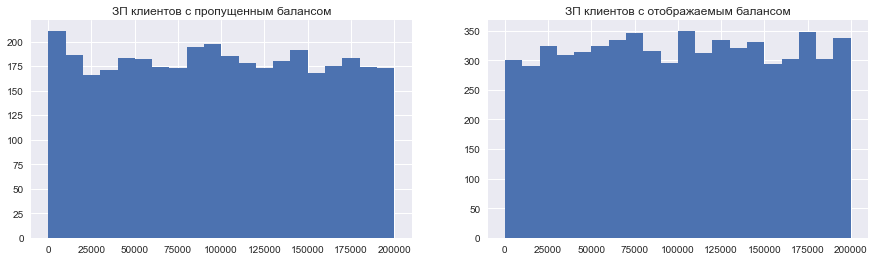

In [14]:
fig, axes = plt.subplots(1,2, figsize=(15,4))

missing_balance['estimated_salary'].hist(ax=axes[0], bins=20)
present_balance['estimated_salary'].hist(ax=axes[1], bins=20)


axes[0].set_title('ЗП клиентов с пропущенным балансом')
axes[1].set_title('ЗП клиентов с отображаемым балансом')


plt.show()

Клиенты с пропущенным балансом часто имеют ЗП до 20000р, в целом разницы между двумя категориями клиентов не наблюдается. 

Посмотрим на распределение колличества используемых продуктов для клиентов с пропущенным и отображаемым балансом:

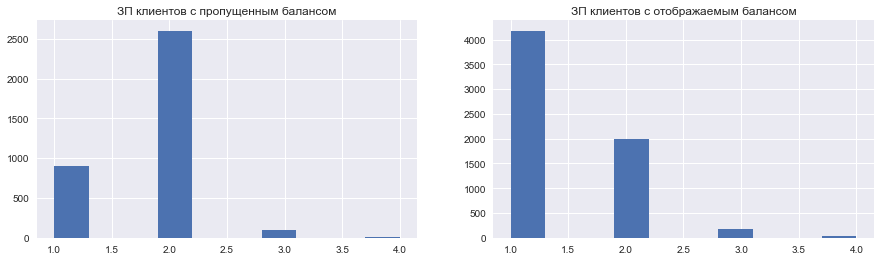

In [15]:
fig, axes = plt.subplots(1,2, figsize=(15,4))

missing_balance['products'].hist(ax=axes[0])
present_balance['products'].hist(ax=axes[1])


axes[0].set_title('ЗП клиентов с пропущенным балансом')
axes[1].set_title('ЗП клиентов с отображаемым балансом')


plt.show()

На графике видно, что клиенты с пропущенным балансом часто пользуются двумя продуктами, это может быть кредитная карта и страховка или же ипотека и кредитная карта. Клиенты с отображаемым балансом чаще всего пользуются одним продуктом.

На основе вышеперечисленного можно предположить, что пропуски связаны с отсутствием дебетовой карты, банковского вклада или балансом близким к нулю. Пропущенные значения отсутствовали только в городе Ростов Великий, население этого города составляет приблизительно 30406, можно предположить, что в городах с маленьким населением отсутствует большая часть продуктов и из-за этого клиенты во всех случаях имеют дебетовую карту. Для того, чтобы не искажать распределение баланса нулевыми значениями оставим пропуски без изменений.

**Вывод:**

Пропущенные значения в колонке `balance` скорее всего возникали из-за отсутствия у клиентов дебетовой карты, вклада или при балансе близком к нулю, учитываю данную особенность принимаем решения оставлять пропуски без изменения.

## Исследовательский анализ данных

### Построим распределение количественных признаков

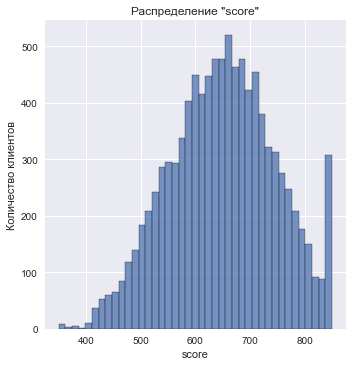

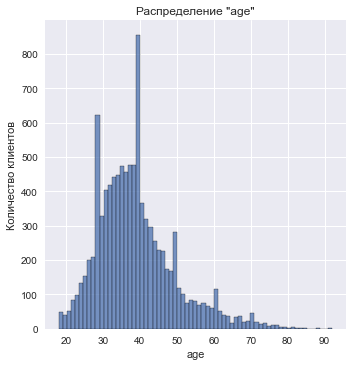

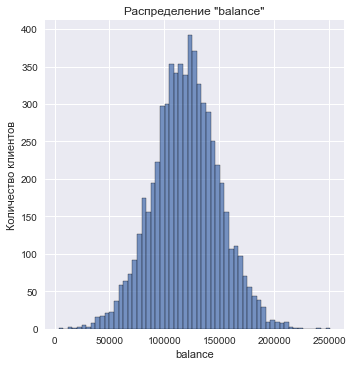

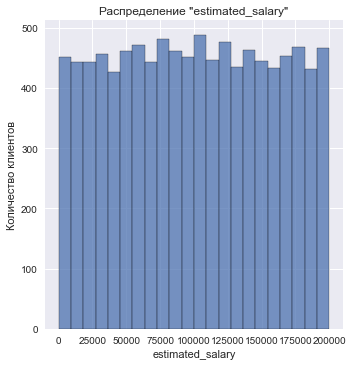

In [16]:
for column in [ 'score', 'age', 'balance', 'estimated_salary']:
    sns.displot(df[column])
    plt.title(f'Распределение "{column}"')
    plt.xlabel(column)
    plt.ylabel('Количество клиентов')
    plt.show()

* На распределении кредитного скоринга  заметен всплеск в районе 900 баллов, который возникает скорее всего из-за особенностей модели, с помощью которой присваиваются баллы клиентам, в остальном распределение близко к нормальному.
* Клиентами банка являются лица в возрасте 18-90 лет, наблюдается всплеск клиентов с возрастом 30 и 40 лет. Возраст большей части клиентов от 30 до 50 лет, после 50 лет наблюдается тенденция к снижению.
* Баланс на счёте клиентов имеет нормальное распределение.
* Заработная плата клиентов распределена равномерно и это настораживает т.к. в реальной жизни встретить такое распределение маловероято.

### Построим распределение категориальных признаков

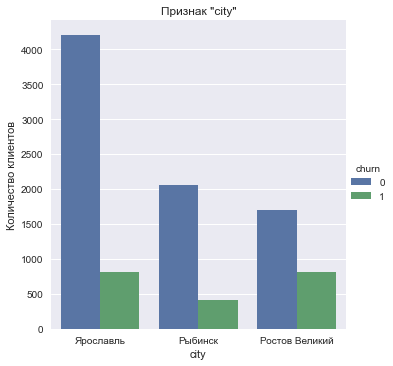

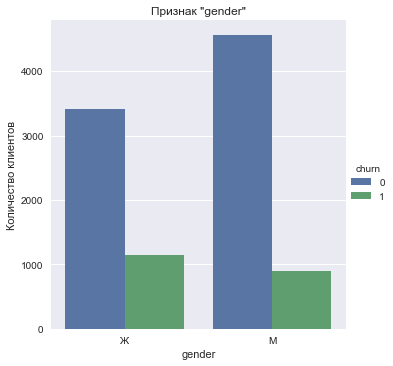

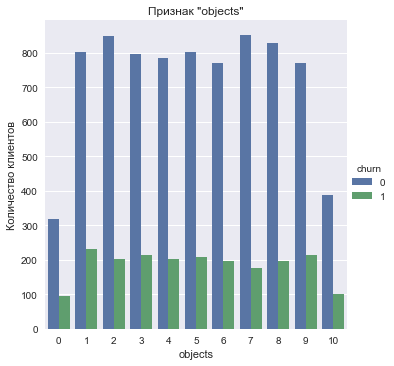

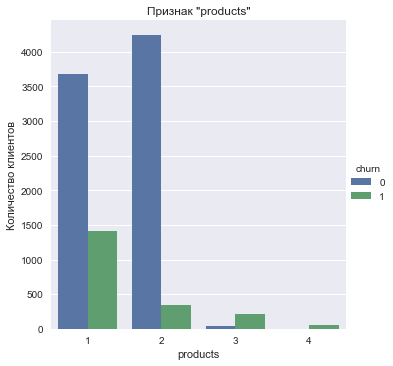

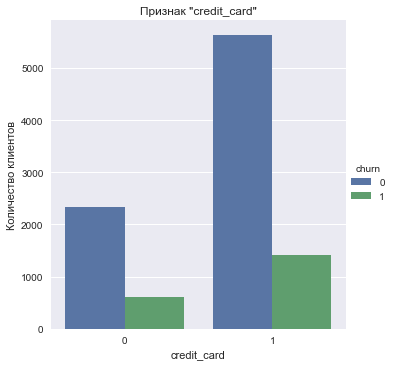

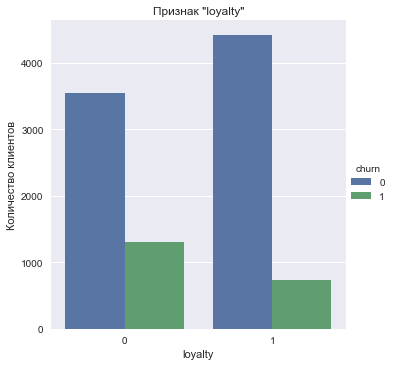

In [17]:
for column in ['city', 'gender', 'objects', 'products', 'credit_card','loyalty']:
    sns.catplot(kind="count", x=column, hue="churn", data=df)
    plt.title(f'Признак "{column}"')
    plt.xlabel(column)
    plt.ylabel('Количество клиентов')
    plt.show()

Посмотрим как распределены клиенты по колличеству потребляемых продуктов:

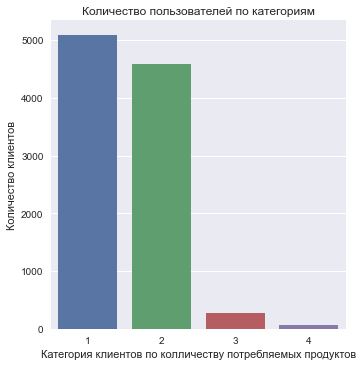

In [18]:
sns.catplot(kind="count", x='products',  data=df)
plt.title('Количество пользователей по категориям')
plt.xlabel('Категория клиентов по колличеству потребляемых продуктов')
plt.ylabel('Количество клиентов')
plt.show()

* Большинство клиентов из Ярославля. В отосительных величинах самое хорошее удержание у клиентов из Ярославля, клиенты из Ростова Великого удерживаются хуже всех.
* Клиентов мужского пола больше чем женского, при этом мужчины по каким-то причинам удерживаются лучше.
* Очень редко встречаются клиенты без собственности, так же редко встречаются клиенты с десятью обьектами в собственности, остальное количество обьектов всобственности распределено равномерно.
* Чаще всего клиенты пользуются одним продуктом банка, далее по числеднности идут пользователи двух продуктов. Лучше всего удерживаются пользователи двух продуктов, а пользователи 3 и 4 продуктов уходят чаще чем остаются, возможно этим клиентам предлагался кокой-то неудачный продукт, после использования которого они решили уйти из банка.
* Клиентов обладающих кредитной картой подавляющее большинство, при рассмотре относительных значений клиенты имеющие кредитку и не имеющие кредитку удерживаются примерно одинаково.
* Активных клиентов больше и удерживаются они гораздо лучше.

**Вывод:**

Клиентами банка являются лица в возрасте от 18 до 90 лет, возраст большей части клиентов от 30 до 50 лет, так же наблюдается всплеск клиентов в возрасте 28 и 40 лет, клиентов мужского пола большинство. Основной массе клиентов присвоено приблизительно 550-750 баллов кредитного скоринга. Баланс распределён нормально, заработная плата клиентов по каким-то причинам распределена равномерно. Большинство клиентов из Ярославля, клиентов из Рыбинска и Ростова Великого примерно равное количество. Большинство клиентов пользуются одним или двумя продуктами, у пользователей двух продуктов лучшее удержание. Кредитной картой пользуются 70% клиентов банка.

## Сегметация пользователей

В рамках проекта необходимо произвести сегментацию пользователей по колличеству потребляемых продуктов, в данных присутствуют пользователи максимум четырех продуктов, разделим пользователей на 4 группы и подробнее рассмотрим каждую из них.

Посмотрим на распределение колличественных признаков с разделением по колличеству потребляемых продуктов:

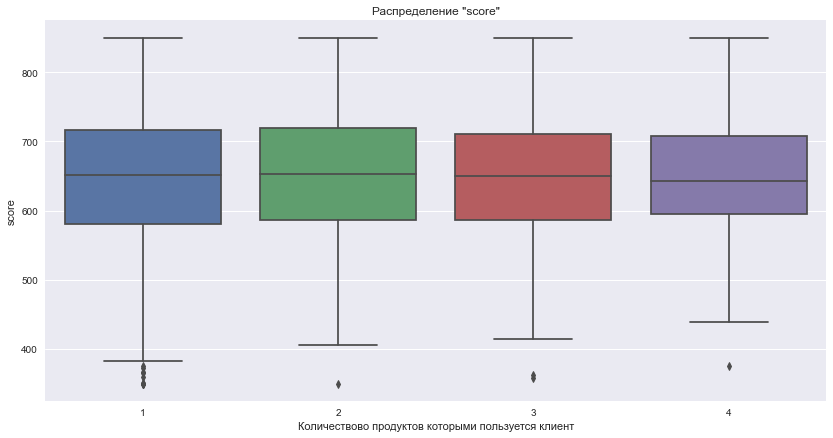

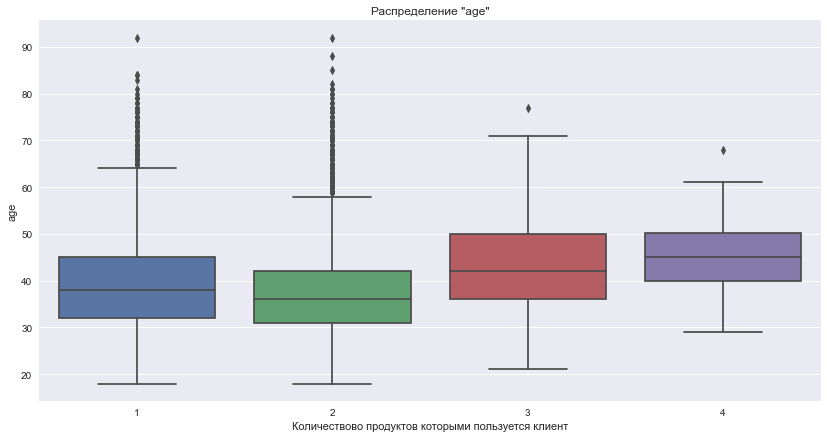

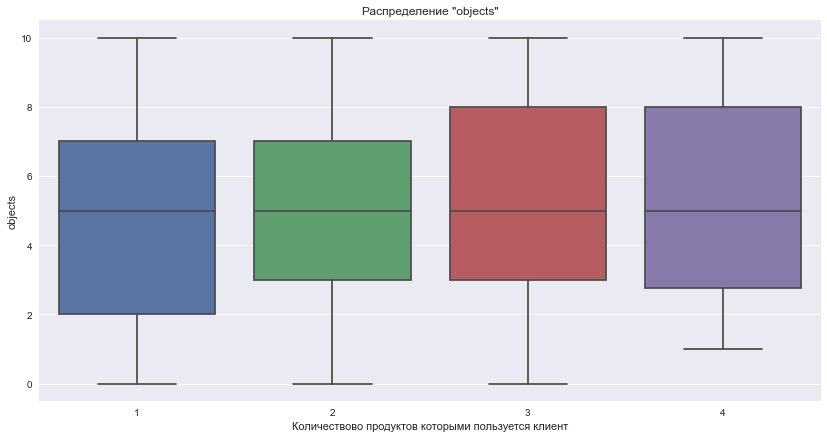

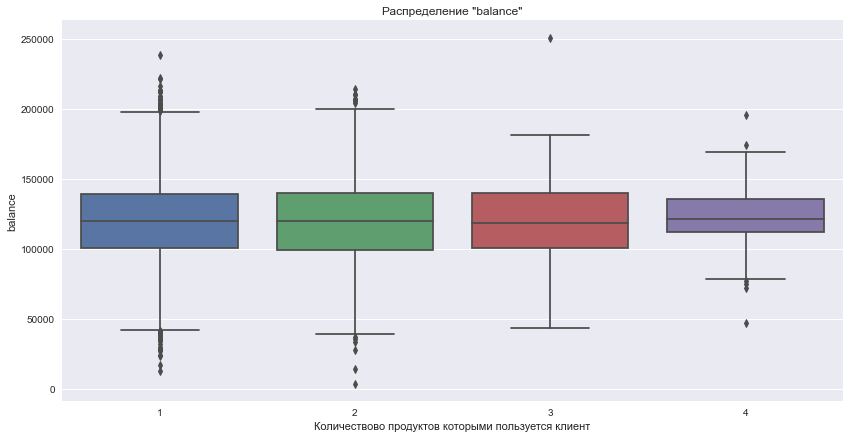

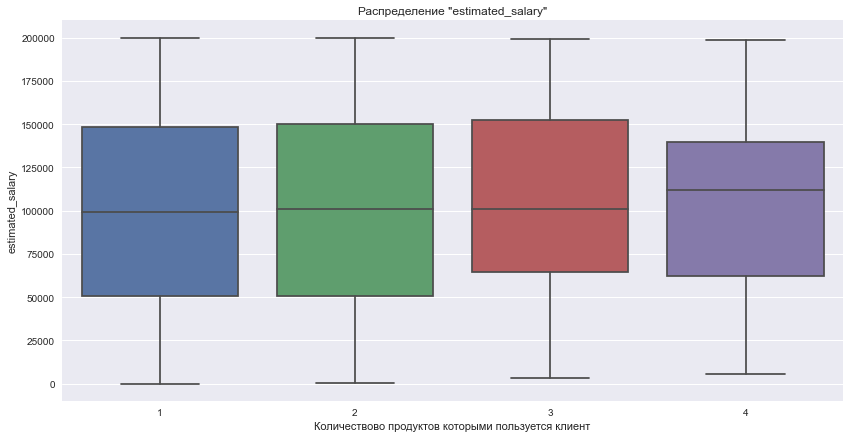

In [19]:
for column in ['score', 'age', 'objects', 'balance', 'estimated_salary']:
    plt.figure(figsize=(14,7))
    sns.boxplot(data=df, x='products', y=column)
    plt.title(f'Распределение "{column}"')
    plt.xlabel('Количествово продуктов которыми пользуется клиент')
    plt.show()

* Баллы кредитного скоринга во всех группах распределены одинаково.
* Пользователи двух продуктов являются самыми молодыми.
* Пользователи трех или четырех продуктов чаще имеют в собственности больше обьектов, чем пользователи первых двух групп.
* Распределение баланса в первых трех группах практически не отличается, разброс баланса в четвертой группе значительно меньше. * Заработная плата первых двух групп распределена одинаково, медианная зарплата в четвертой группе немного выше, чем в остальных.

Построим распределение категориальных признаков по колличеству потребляемых продуктов:

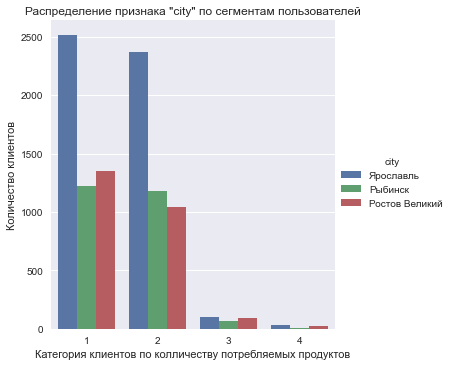

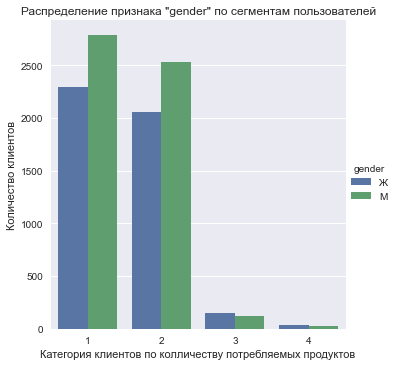

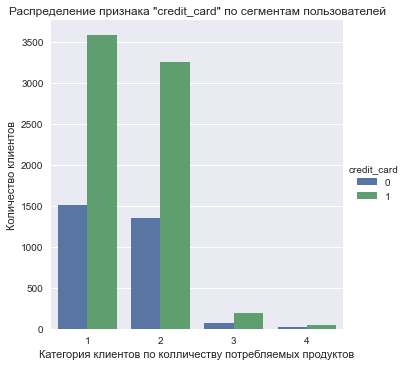

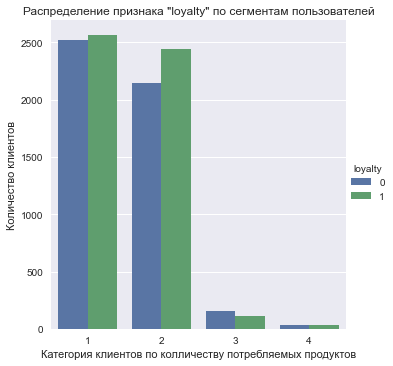

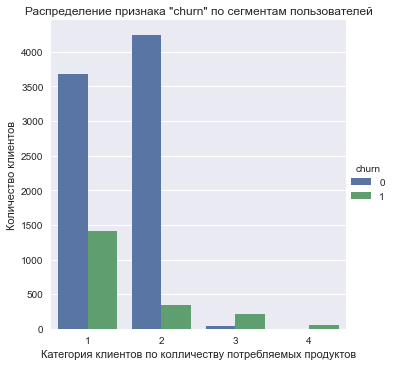

In [20]:
for column in ['city', 'gender', 'credit_card','loyalty', 'churn']:
    sns.catplot(kind="count", x='products', hue=column, data=df)
    plt.title(f'Распределение признака "{column}" по сегментам пользователей')
    plt.xlabel('Категория клиентов по колличеству потребляемых продуктов')
    plt.ylabel('Количество клиентов')
    plt.show()

* Клиенты потребляющие один или два продукта чаще всего из Ярославля и это логично т.к. 50% от общего числа клиентов являются жителями Ярославля.
* Подавляющее большинство всех групп обладают кредитной картой.
* Большинство клиентов использующиз два продукта банка являются активными.
* В относительных величинах самый низкий отток у второй группы пользователей.

Сделаем срез данных в который войдут только пользователи `попавшие в отток` и попробуем установить причину такого поведения:

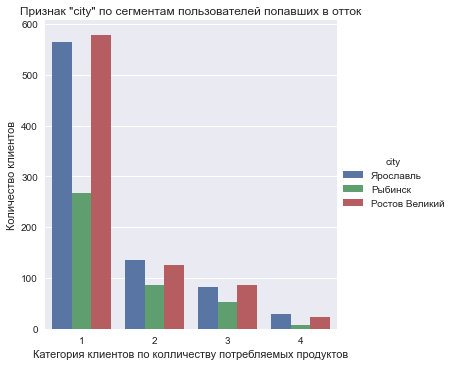

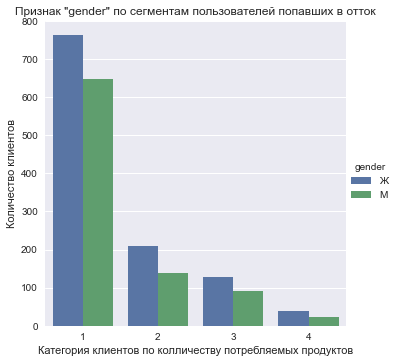

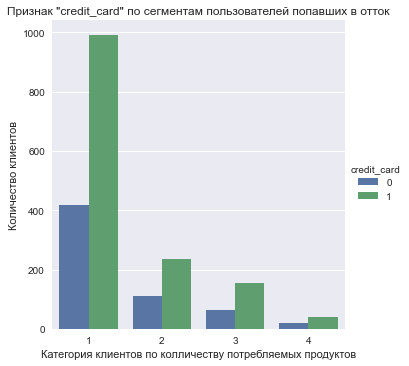

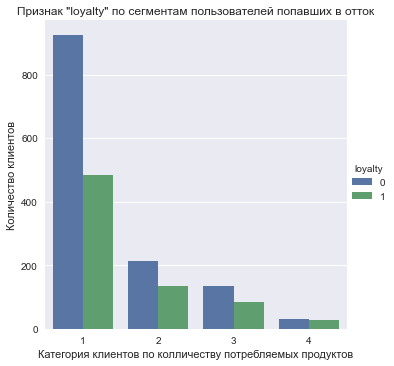

In [21]:
for column in ['city', 'gender', 'credit_card','loyalty']:
    sns.catplot(kind="count", x='products', hue=column, data=df[df['churn']==1])
    plt.title(f'Признак "{column}" по сегментам пользователей попавших в отток')
    plt.xlabel('Категория клиентов по колличеству потребляемых продуктов')
    plt.ylabel('Количество клиентов')
    plt.show()

* В Ростове Великом колличеству ушедших пользователей на равне с Ярославлем, при этом пользователей из Ярославля в два раза больше, менеджерам Ростовского филиала банка стоит задуматься о возможных причинах такого поведения клиентов(Отток пользователей из Ростова Великого составляет 30%). 
* Попавшие в отток клиенты в большинстве случаев имели кредитную карту.
* Меньше всего активных клиентов встречается в первой группе.

Построим сводную таблицу по средним значениям с группировкой по колличеству потребляемых продуктов, в колонках бинарных признаков будут отображаться доли:

In [22]:
df.drop(columns='user_id', axis=1).groupby('products').mean().reset_index()

,products,score,age,objects,balance,credit_card,loyalty,estimated_salary,churn
0,1,649.120968,39.673092,4.974626,119894.163723,0.703777,0.504131,99487.256851,0.277144
1,2,652.188671,37.753595,5.051852,119660.944362,0.707190,0.532898,100452.012821,0.075817
2,3,648.105263,43.195489,5.003759,119475.686310,0.714286,0.424812,104318.130564,0.827068
3,4,653.583333,45.683333,5.300000,122260.610870,0.683333,0.483333,104763.723333,1.000000


Итак соберём характеристики всех групп воедино:
* `Пользователи одного продукта` встречаются в данных чаще всего, большинство из них проживает в Ярославле. В отток попадает 27% этих пользователей, активных и неактивных пользователей примерно равное количество. Больше половины пользователей попавших в отток являлись неактивными. Клиенты первой группы в основном моложе клиентов 3 и 4 группы. Клиентов мужского пола преобладающее большинство, при этом в отток чаще всего попадают женщины.
* `Пользователи двух продуктов` находятся на втором месте по численности, большинство из них так же проживает в Ярославле. В отток попадает всего 7% пользователей, что является лучшим показателем среди всех групп. Пользователи из этой группы чаще всего моложе пользователей из других групп, активных клиентов большинство. Большинство клиентов мужского пола, но в отток чаще попадают женщины.
* `Пользователи трех продуктов` чаще всего проживают в Ярославле или Ростове Великом, в отток попадают 82% клиентов из этой категории, возраст клиентов выше, чем в двух предыдущих группах. Клиенты женского пола в этой группе преобладают, большая часть клиентов не активна.
* `Пользователи четырех продуктов` самая малочисленная группа, по каким то причинам пользователи этой группы попадают в отток в 100% случаев. Клиенты этой группы являются самыми взрослыми, медианный баланс и ЗП у клиентов этой группы, выше чем в остальных.

**Вывод:**

Пользователи двух продуктов выделяются на фоне остальных сегментов т.к у этих пользователей лучшее удержание и больше активных пользователей в относительной величине, большинство из них проживает в Ярославле. Менеджерам банка стоит обратить внимание на филиал в Ростове Великов т.к. в нем самый высокий отток. Первая группа клиентов самая численная, при этом отток составляет 27%, для удержания необходимо предлагать клиентам этой группы дополнительные продукты, так же стоит проанализировать продукты потребляемые в 3 и 4 группе, возможно какой-то из них плохого качества, что приводит к такому высокому оттоку.

## Проверка статистических гипотез

### Гипотеза о различии дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

Посчитаем статистическую значимость о различии дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми которые пользуются одним, данные распределены не нормально, поэтому воспользуемся непараметрическим критерием `Манна-Уитни`, уровень статистической значимости принимаем за `5%`.

Сформулируем нулевую и альтернативную гипотезу:
* H₀ - Доходы клиентов пользующихся одним продуктом банка и клиентов пользующихся двумя продуктами банка `НЕ РАЗЛИЧАЮТСЯ`
* H₁ - Доходы клиентов пользующихся одним продуктом банка и клиентов пользующихся двумя продуктами банка `РАЗЛИЧАЮТСЯ`

Разделим данные на две группы:

In [23]:
one_product = df.query('products == 1')['estimated_salary']
two_product = df.query('products == 2')['estimated_salary']

In [24]:
alpha = .05 # критический уровень статистической значимости

# Посчитаем статистическую значимость различия ЗП между группами с помощью критерия Манна-Уитни
results = st.mannwhitneyu(one_product , two_product)[1]

print('p-значение:', '{0:.3f}'.format(results))

if results < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.408
Не получилось отвергнуть нулевую гипотезу


`Статистически значимой разницы` между доходами клиентов пользующихся одним продуктом и доходами клиентов пользующихся двумя продуктами `нет`.

### Гипотеза о различии дохода между теми клиентами, которые попали в отток, и теми, которые остались.

Посчитаем статистическую значимость о различии дохода между теми клиентами, которые попали в отток, и теми, которые остались, данные распределены не нормально, поэтому воспользуемся непараметрическим критерием `Манна-Уитни`, уровень статистической значимости принимаем за `5%`.

Сформулируем нулевую и альтернативную гипотезу:
* H₀ - Доходы клиентов попавших в отток и клиентов оставшихся в компании `НЕ РАЗЛИЧАЮТСЯ`
* H₁ - Доходы клиентов попавших в отток и клиентов оставшихся в компании `РАЗЛИЧАЮТСЯ`

Разделим данные на две группы:

In [25]:
no_churn = df.query('churn == 0')['estimated_salary']
churn = df.query('churn == 1')['estimated_salary']

In [26]:
alpha = .05 # критический уровень статистической значимости

# Посчитаем статистическую значимость различия ЗП между группами с помощью критерия Манна-Уитни
results = st.mannwhitneyu(no_churn , churn)[1]

print('p-значение:', '{0:.3f}'.format(results))

if results < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.227
Не получилось отвергнуть нулевую гипотезу


`Статистически значимой разницы` между доходами клиентов попавших в отток и оставшихся в компании `нет`.

## Общие выводы и рекомендации

* `Пользователи одного продукта` встречаются в данных чаще всего, большинство из них проживает в Ярославле. В отток попадает 27% этих пользователей, активных и неактивных пользователей примерно равное количество. Больше половины пользователей попавших в отток являлись неактивными. Клиенты первой группы в основном моложе клиентов 3 и 4 группы. Клиентов мужского пола преобладающее большинство, при этом в отток чаще всего попадают женщины. Клиентам данного сегмента необходимо продавать дополнительные продукты, такие как ипотека или накопительный счёт. Практика показывает, что клиенты потребляющие два продукта удерживаются лучше всего, выбирать предлагаемые продукты стоит тщательно т.к эти клиенты потенциально могут перейти во второй сегмент и стать постоянными.

* `Пользователи двух продуктов` находятся на втором месте по численности, большинство из них так же проживает в Ярославле. В отток попадает всего 7% пользователей, что является лучшим показателем среди всех групп. Пользователи из этой группы чаще всего моложе пользователей из других групп, активных клиентов большинство. Большинство клиентов мужского пола, но в отток чаще попадают женщины. Пользователям этой категории стоит рекомендовать такие продукты как ипотека или кредит наличными т.к. клиенты этого сегмента чаще всего молодые люди, данный шаг может значительно улучшить удержание.

* `Пользователи трех продуктов` чаще всего проживают в Ярославле или Ростове Великом, в отток попадают 82% клиентов из этой категории, возраст клиентов выше, чем в двух предыдущих группах. Клиенты женского пола в этой группе преобладают, большая часть клиентов не активна. Менеджерам банка стоит обратить внимание на этот сегмент, проанализировать продукты потребляемые этими клиентами и доработать неудачные продукты. Возможно стоит провести маркетинговую компанию нацеленную на удержание клиентов, например отмена плат за обслуживание различных продуктов, повышенные процентные ставки по вкладам и т.д.

* `Пользователи четырех продуктов` самая малочисленная группа, по каким то причинам пользователи этой группы попадают в отток в 100% случаев. Клиенты этой группы являются самыми взрослыми, медианный баланс и ЗП у клиентов этой группы, выше чем в остальных. Для клиентов этого сегмента так же стоит проанализировать потребляемые продукты и доработать неудачные. Клиенты данной группы имеют самый высокий доход и возможно ожидают более премиального обслуживания, необходимо разработать или доработать премиальные продукты банка. Так же клиентам этой группы стоит чаще предлагать накопительные и инвестиционные счета, сейфовые ячейки, кешбек системы.